## Importing the libraries

In [34]:
# For data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import os

# For scaling the features
from sklearn.preprocessing import StandardScaler

# For doing multivariate imputation
from sklearn.impute import KNNImputer

# For performing diemsionality reduction
from sklearn.manifold import TSNE

# For visualization of clusters and scatter plot in 3d
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Reading the data from csv files

In [20]:
# Reading the dataframes
df = pd.DataFrame()

# Loading the traing and test data
train_data = pd.read_csv('../train.csv') 
test_data = pd.read_csv('../test.csv')

In [21]:
# Dropping the features
train_data.drop(['Segmentation','ID','Var_1'],axis=1,inplace=True)
test_data.drop(['ID','Var_1'],axis=1,inplace=True)

In [23]:
df = pd.concat([df,train_data,test_data],axis=0)
print(f"The data have {(df.shape)[0]} rows and {(df.shape)[1]} columns")

The data have 21390 rows and 8 columns


## Exploratory data analysis

In [24]:
# Checking 5 random rows 
df.sample(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
2148,Female,No,30,No,Healthcare,0.0,Low,3.0
2302,Male,No,20,No,Healthcare,3.0,Low,4.0
4595,Male,Yes,62,Yes,Artist,0.0,Average,NaN
651,Male,Yes,67,Yes,Artist,1.0,High,NaN
285,Male,No,36,Yes,Artist,4.0,Low,1.0


In [25]:
duplicate_cnts = df.duplicated().sum()
if duplicate_cnts > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicate_cnts} dupicate values removed")
else:
    print("There are no duplicate values")

12714 dupicate values removed


In [26]:
df.isnull().mean()*100

Gender              0.000000
Ever_Married        2.132319
Age                 0.000000
Graduated           1.129553
Profession          1.821116
Work_Experience    11.088059
Spending_Score      0.000000
Family_Size         4.956201
dtype: float64

In [27]:
cols_nan = ['Ever_Married','Graduated','Profession','Family_Size']
for cols in cols_nan:
    df[cols] = df[cols].fillna(df[cols].mode()[0])

In [28]:
# Checking percentage of missing values
df.isnull().mean()*100

Gender              0.000000
Ever_Married        0.000000
Age                 0.000000
Graduated           0.000000
Profession          0.000000
Work_Experience    11.088059
Spending_Score      0.000000
Family_Size         0.000000
dtype: float64

In [29]:
# Ordinal encoding
df['Spending_Score'] = df['Spending_Score'].replace({'Low': 0.0, 'Average': 1.0, 'High': 2.0}).infer_objects(copy=False)

C:\Users\ropar_i9941t3\AppData\Local\Temp\ipykernel_8328\3094096314.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [30]:
features_to_encode = ['Gender', 'Ever_Married','Graduated','Profession']

# Applying get_dummies to the specified features
encoded_df = pd.get_dummies(df, columns=features_to_encode,dtype=int,drop_first=True)

## Multivariate imputation

In [31]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Perform KNN imputation
new_df = pd.DataFrame(imputer.fit_transform(encoded_df), columns=encoded_df.columns)

## Scaling the data
Scaling the features is generally recommended before performing dimensionality reduction techniques like PCA and even some flavors of t-SNE. Here's why:

- Standardizes Units: When features have different units or scales (e.g., centimeters vs. kilometers), algorithms like PCA prioritize features with larger scales, potentially neglecting informative features with smaller values. Scaling ensures all features contribute equally.
- Improves Distance Measures: Dimensionality reduction techniques often rely on distance measures like Euclidean distance. Scaling ensures these distances accurately reflect the relative importance of features in the data.

In [35]:
# Instantiating the standardscaler class object
scaling = StandardScaler()
scaled_data = scaling.fit_transform(new_df)

## Dimensionality reduction
Benefits of Dimensionality Reduction Before Clustering:

- Addresses the Curse of Dimensionality: In high dimensions, distance measures like Euclidean distance become less meaningful, leading to inaccurate clustering results. Dimensionality reduction helps mitigate this by focusing on the most relevant features.
- Improves Clustering Performance: By reducing redundant or irrelevant dimensions, clustering algorithms can identify tighter clusters and achieve better separation between them. This can lead to more accurate and interpretable results.
- Reduces Computational Cost: Clustering algorithms can be computationally expensive, especially on high-dimensional data. Dimensionality reduction reduces the number of features to be processed, leading to faster execution times.

In [41]:
# Dimensionality reduction using TSNE
tsne = TSNE(n_components=3)

reduced_data = tsne.fit_transform(scaled_data)

In [44]:
# Define colors for better visualization (replace with your own logic)
colors = np.random.rand(len(scaled_data), 3)  

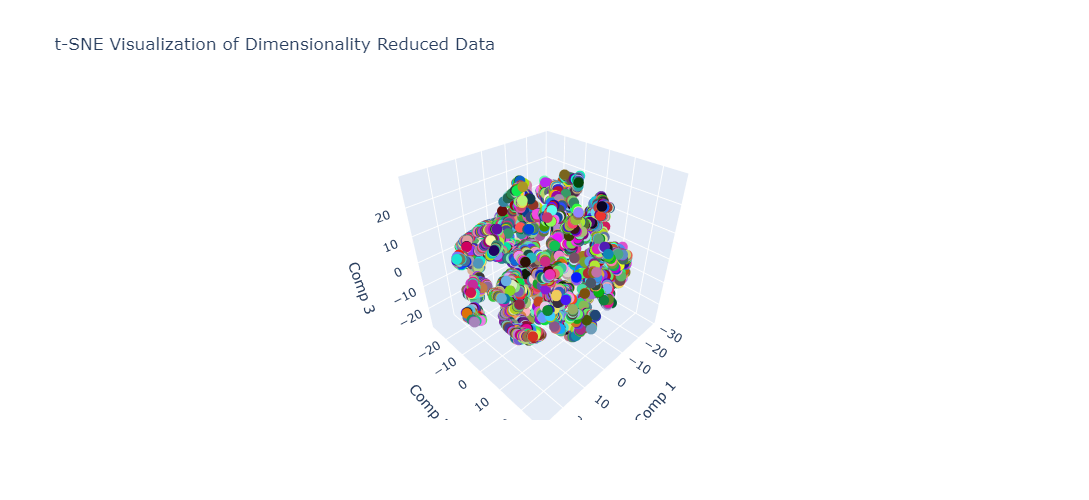

In [50]:
# Create a 3D scatter plot using Plotly
fig = make_subplots(specs=[[{"type": "scatter3d"}]])

tsne_trace = go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers',
    marker=dict(size=6, color=colors),
    name='t-SNE'
)

fig.add_trace(tsne_trace)

# Set plot title and axis labels
fig.update_layout(
    title='t-SNE Visualization of Dimensionality Reduced Data',
    scene=dict(
        xaxis_title='Comp 1',
        yaxis_title='Comp 2',
        zaxis_title='Comp 3'
    ),
    height=500
)

# Render the plot
fig.show()